# DECISION TREE 

In [49]:
# DECISION TREE IS MORE LIKE A FLOWCHART WITH SOMETHING LIKE IF-ELSE STATEMENT SO GIVEN THE DATASET IT MAPS TO THE
# OUTPUT USING THE FLOWCHART LIKE TREES
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [50]:
df=pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [51]:
# SINCE ALL THE DATA FIELDS ARE TEXTS WE NEED TO CONVERT THEM TO NUMERICAL VALUES USING LABEL ENCODER FROM PREPROCESSING
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [52]:
# WE ARE TAKING THE COLUMN AND LABELLING AND TRANSFORMING IT AND THEN WE ARE REWRITING IT ON THE COLUMN OF THE DATAFRAME 
df['company']=le_company.fit_transform(df['company'])
df['job']=le_job.fit_transform(df['job'])
df['degree']=le_degree.fit_transform(df['degree'])
df

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [53]:
# NOW LETS ASSIGN THE INDEPENDENT AND TARGET VARIABLE 
X=df.drop('salary_more_then_100k',axis='columns')
Y=df.drop(['company', 'job', 'degree'],axis='columns')
X
Y

,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


In [54]:
# NOW LETS SPLIT THE DATASET INTO TRAINING AND TESTING SET FROM THE INDEPENDENT AND TARGET VARIABLE
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train
len(X_train)

12

In [55]:
# LETS IMPORT THE DECISION TREE CLASSIFIER MODEL
from sklearn import tree
model=tree.DecisionTreeClassifier()
# WE ARE TRAINING THE DECISION TREE CLASSIFIER MODEL BASED ON THE SPLIT INDEPENDENT AND TARGET VARIABLE
model.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [56]:
# NOW LETS SEE THE PRECISION OF THE MODEL 
model.score(X_test,Y_test)

0.75

In [57]:
# LETS USE THE MODEL TO MAKE PREDICTIONS 
model.predict(X_test)

array([0, 1, 1, 1])

In [58]:
# LETS PLOT A CONFUSION MATRIX TO CHECK WHERE THE MODEL PREDICTED RIGHT AND WRONG
from sklearn.metrics import confusion_matrix
Y_predicted=model.predict(X_test)
cm=confusion_matrix(Y_predicted,Y_test)
cm

array([[0, 1],
       [0, 3]])

Text(50.722222222222214, 0.5, 'Actual Value')

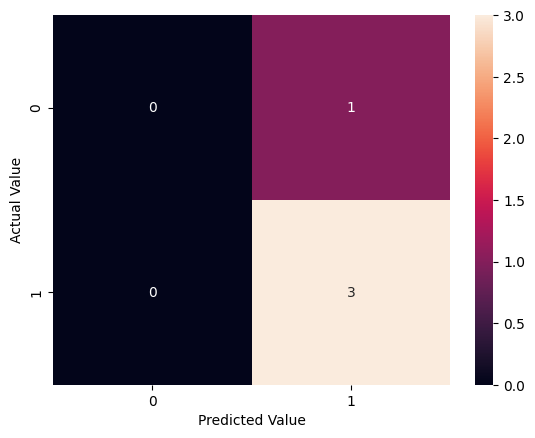

In [59]:
# NOW LETS PLOT A HEAT MAP FOR THE CONFUSION MATRIX USING SEABORN 
import seaborn as sn 
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')